In [3]:
import pandas as pd
import numpy as np
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [8]:
# write your code here
path_to_project = "/Users/miste/DataspellProjects/py-restaurant-data-analysis/"
path = sqlite3.connect(path_to_project + "db.sqlite3")
df_restaurant = pd.read_sql(
    "SELECT restaurant_orderitem.id, quantity, datetime, price, name FROM restaurant_orderitem JOIN restaurant_order on restaurant_orderitem.order_id = restaurant_order.id JOIN restaurant_product rp on restaurant_orderitem.product_id = rp.id", path
)

In [12]:
from pathlib import Path
csv_path = Path(path_to_project + "order.csv")
csv_path.parent.mkdir(parents=True, exist_ok=True)
df_restaurant.to_csv(csv_path)
df_restaurant

,id,quantity,datetime,price,name
0,1,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,2,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,3,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,4,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,5,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala
...,...,...,...,...,...
74813,74814,2,2016-05-18 18:53:00,17.95,House Red wine 75cl
74814,74815,2,2016-05-14 19:28:00,17.95,House Red wine 75cl
74815,74816,2,2016-05-10 13:18:00,17.95,House Red wine 75cl
74816,74817,1,2016-04-07 19:04:00,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 most popular products in restaurant sold by Quantity'}, ylabel='quantity'>

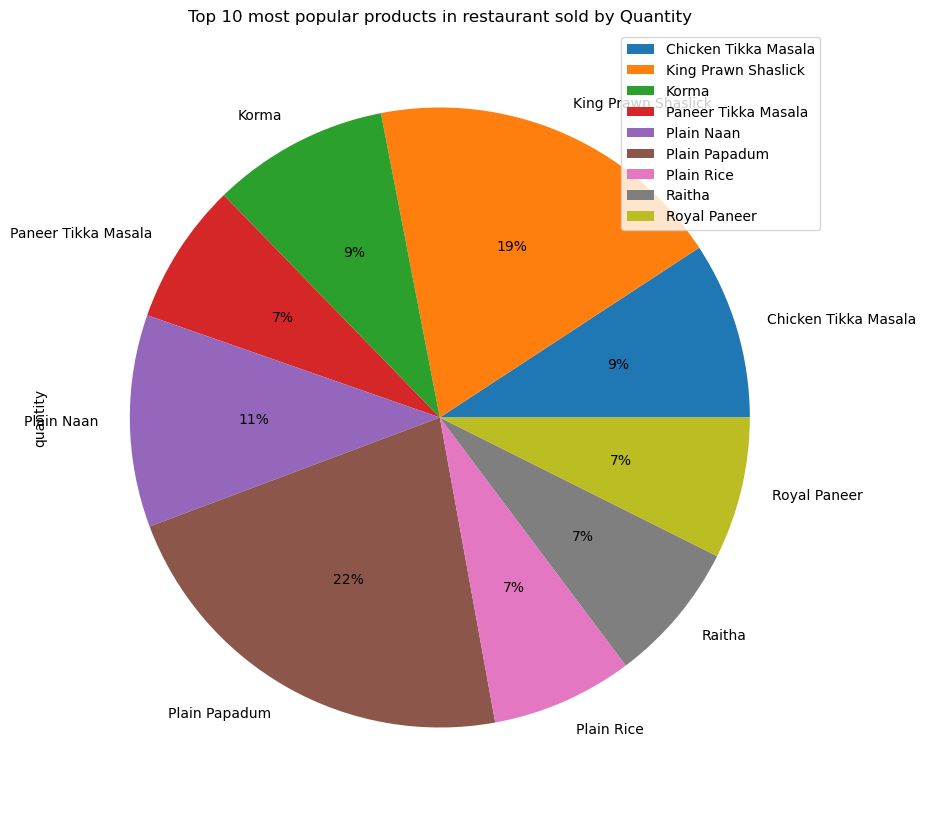

In [30]:
# write your code here
top_10_products_sold_by_quantity = df_restaurant.sort_values(by="quantity", ascending=False).head(10)
top_10_products_sold_by_quantity.groupby(["name"]).sum().plot.pie(y="quantity", title="Top 10 most popular products in restaurant sold by Quantity", figsize=(10, 25), autopct='%1.0f%%')

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 most popular products in restaurant sold by Item Price'}, ylabel='Item Price'>

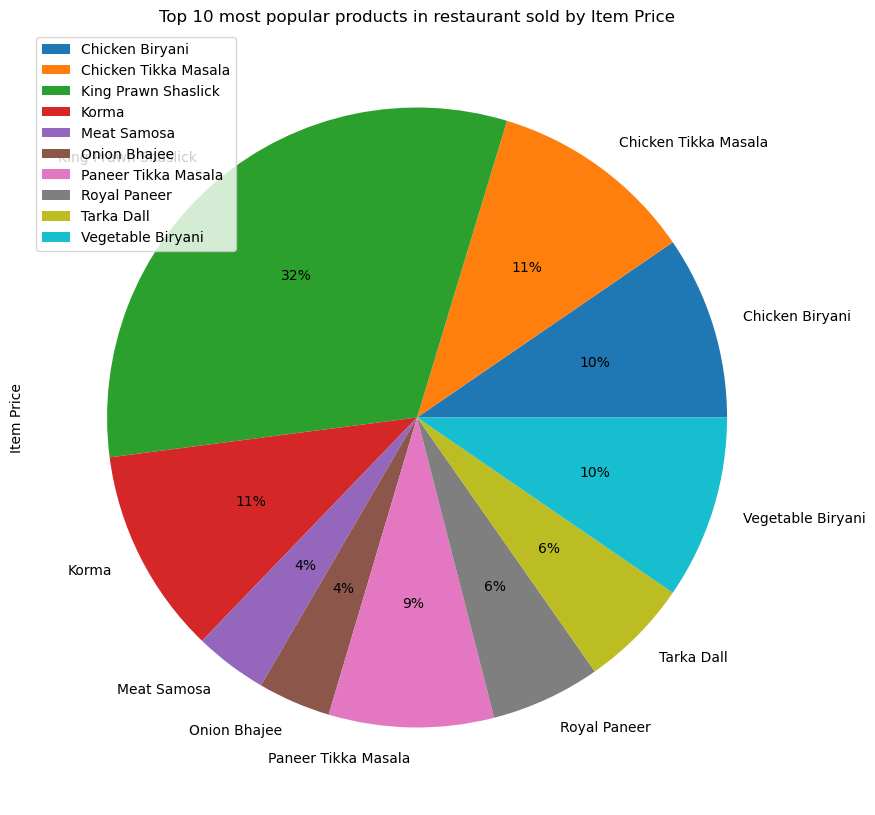

In [36]:
# write your code here
df_restaurant["Item Price"] = df_restaurant["quantity"] * df_restaurant["price"]
top_10_products_sold_by_item_price = df_restaurant.sort_values(by="Item Price", ascending=False).head(10)
top_10_products_sold_by_item_price.groupby(["name"]).sum().plot.pie(y="Item Price", title="Top 10 most popular products in restaurant sold by Item Price", figsize=(10, 25), autopct='%1.0f%%')

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<BarContainer object of 23 artists>

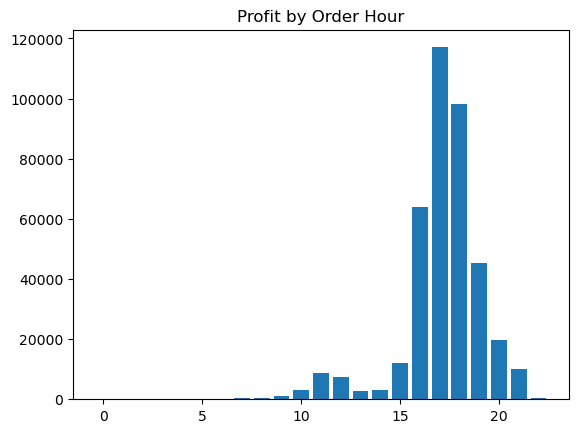

In [58]:
# write your code here
from matplotlib import pyplot as plt
df_restaurant["Hour"] = pd.to_datetime(df_restaurant["datetime"]).dt.hour

hours = np.arange(23)
plt.title("Profit by Order Hour")
plt.bar(hours, df_restaurant[["Hour", "price"]].groupby("Hour").sum().price)

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<BarContainer object of 7 artists>

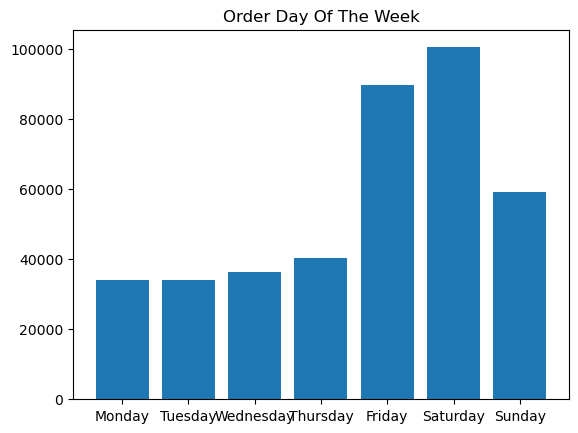

In [63]:
# write your code here
df_restaurant["day of week"] = pd.to_datetime(df_restaurant["datetime"]).dt.day_of_week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.title("Order Day Of The Week")
plt.bar(days, df_restaurant[["day of week", "price"]].groupby("day of week").sum().price)